# King County Realestate Endeavors


## Business Understanding
- The key stakeholders for this analysis project are potential home buyers who are coming to the king county area
- We are using a data set of recent house sales in king county from 2021-2022 to create a predictive model
- We used predictive modeling to predict prices based on certain home features
- Our first recommendation would to be use the tool we created to get prospective homes
- Our second recommendation would be that once a potential home buyer does buy their home, to bolster certain features of their homes to add value

## Data Understanding/Data Preperation

In [1]:
#importing all packeges required for code below
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#dataset
kcdf = pd.read_csv('../data/kc_house_data.csv')

In [3]:
#dropping this column because it is insignificant for our data wrangling purposes
kcdf = kcdf.drop(columns = 'date')

In [4]:
#dropping all the nulls from the dataframe
kcdf = kcdf.dropna()

In [5]:
#function to get all the zipcodes from the addresses
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [6]:
#creating a zip code column from the address columns using our zip code function.
kcdf['zip_code'] = kcdf['address'].apply(lambda x: zip_code(x))

In [7]:
#converting the zip code column from a string to an integer
kcdf['zip_code'] = kcdf['zip_code'].astype(int)

In [8]:
#from the government database, we filtered all of the zipcodes from King County and inputted them here
kc_zips = [98001, 98002,98003, 98004,98005,98006, 98007,98008,98009, 98010, 98011, 98013, 98014,98015,98019,98022,98023,98024,98025,98027,98028,98029,98030,98031,98032,98033,98034,98035,98038,98039,98040,98041,98042,98045,98047,98050,98051,98052,98053,98054,98055,98056,98057,98058,98059,98062,98063,98064,98065,98070,98071,98072,98073,98074,98075,98077,98083,98089,98092,98093,98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98113,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98127,98129,98131,98132,98133,98134,98136,98138,98139,98141,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98165,98166,98168,98170,98171,98174,98175,98177,98178,98181,98184,98185,98188,98190,98191,98194,98195,98198,98199,98224,98288]

In [9]:
#filtered our data to make sure that the housing sales in our data are actually from King County
realkcdf = kcdf[kcdf['zip_code'].isin(kc_zips)]

Implementing Zip Codes function is key because there were house sales in our data set that were outside of King County 

In [10]:
#Checking how many zip codes in King County had house sales in our data set
realkcdf['zip_code'].nunique()

76

In [11]:
#Function to take two coordinated and calculate distance in miles
def geo_distance(coord_a, coord_b):
    
    return geodesic(coord_a, coord_b).miles

In [12]:
#Amazon headquarter coordinates
amzn_coord = (47.615722, -122.339494)

In [13]:
#zipping the columns lat and long into one column called location
realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))

<ipython-input-13-8c1612a1b5ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))


In [14]:
#creating a column called distance to amazon using the location column and amazon coordinates. Distance is measured in miles
realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)

<ipython-input-14-df354bc015d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)


In [15]:
#Filter data to have only the houses that were sold with in three miles of Amazon
data_near_amzn = realkcdf[realkcdf['distance_to_amazon'] <= 3]

In [16]:
#filtering out one of the big outliers
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]

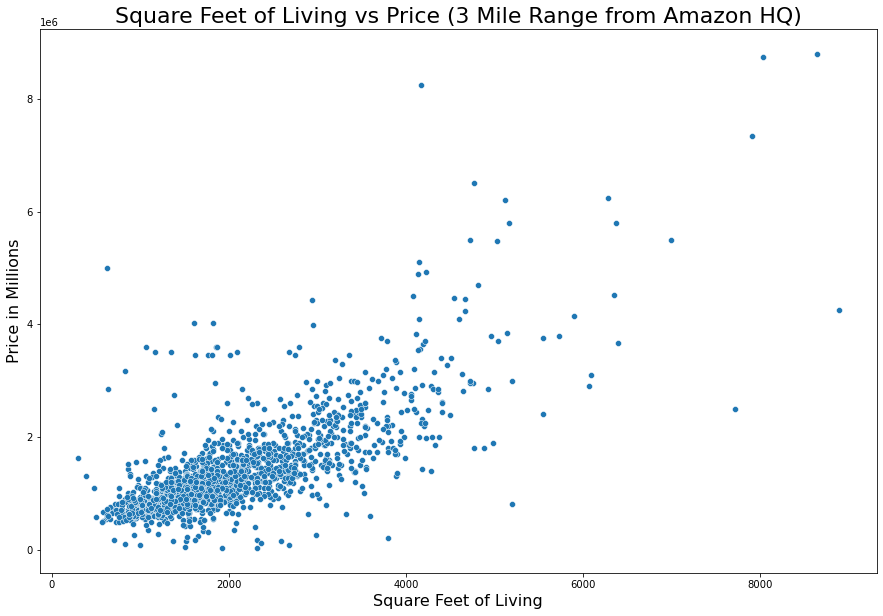

In [17]:
#plotting the regression and relationship of the sqft of living vs the price of the actual values of sold prices 
fig, ax = plt.subplots(figsize = (15,10))

x = data_near_amzn_filt['sqft_living']
y = data_near_amzn_filt['price']
hue = data_near_amzn_filt['bedrooms']
size = data_near_amzn_filt['bathrooms']


sns.scatterplot(x = x, y = y, ax=ax)
ax.set_title('Square Feet of Living vs Price (3 Mile Range from Amazon HQ)', fontsize = 22)
ax.set_ylabel('Price in Millions', fontsize = 16)
ax.set_xlabel('Square Feet of Living', fontsize = 16);

C:\Users\somdd\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


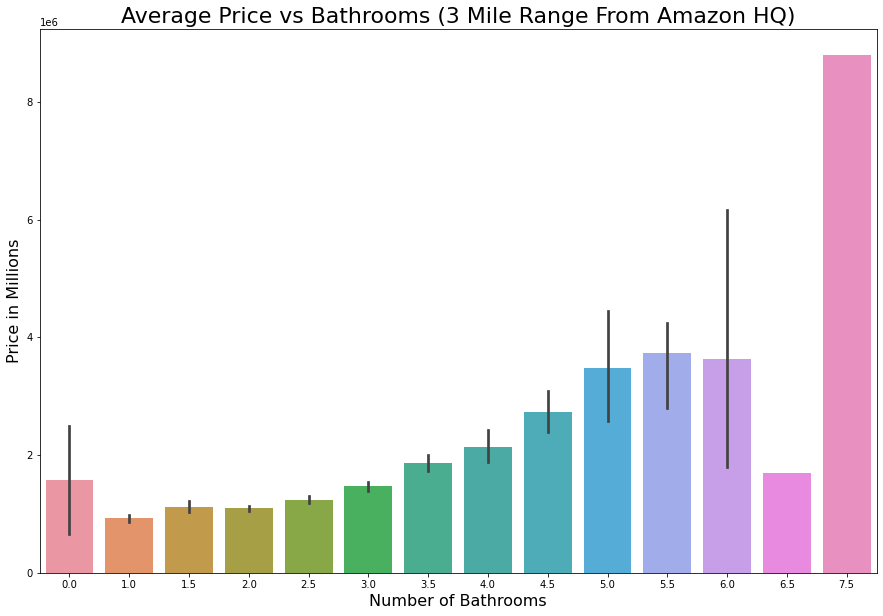

In [18]:
#plotting the view category and the mean price for each
fig, ax = plt.subplots(figsize = (15,10))

x = data_near_amzn_filt['bathrooms']
y = data_near_amzn_filt['price']

sns.barplot(x, y, data = realkcdf, ax = ax)
ax.set_title('Average Price vs Bathrooms (3 Mile Range From Amazon HQ)', fontsize = 22)
ax.set_ylabel('Price in Millions', fontsize = 16)
ax.set_xlabel('Number of Bathrooms', fontsize = 16);




In [19]:
#q1 = realkcdf['price'].quantile(.25)
#q3 = realkcdf['price'].quantile(.75)
#IQR = q3 - q1
#outliers = realkcdf[((realkcdf['price']<(q1-1.5*IQR)) | (realkcdf['price']>(q3+1.5*IQR)))]

In [20]:
#outliers

In [ ]:
#creating a pairplot to look at relationships of all numerical values
sns.pairplot(realkcdf, corner = True)

In [ ]:
#plotting a heatmap to look at the collinearity of dependent variables
plt.figure(figsize = (20,20))
sns.heatmap(realkcdf.corr(), annot = True)

In [ ]:
#creating lists to put in the ordinal encoder
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [ ]:
#Ordinal encoding lists and creating an ordinal datafram
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [ ]:
#concatenating the realkcdf and ordinal dataframes and 
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [ ]:
#Onehot Encoding
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [ ]:
#makeing a list of what columns I want to onehot encode
nominal_cols = ['waterfront', 'greenbelt', 'nuisance','heat_source', 'sewer_system','zip_code']

In [ ]:
#Fit_transforming the nominal columns and assigning it to variable
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [ ]:
#creating a nominal dataframe 
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [ ]:
#Concatenating the two data frames while dropping the columns names from the first dataframe and adding the columns names from the second data frame to replace the ones dropped in the first column
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

## Modeling

### FSM

In [ ]:
#assigning the LinearRegression
lr = LinearRegression()

In [ ]:
col_select1 = realkcdf.drop(columns = ['price', 'id', 'waterfront', 'nuisance', 'waterfront', 'greenbelt', 'view', 'condition', 'grade','heat_source', 'sewer_system', 'address', 'zip_code', 'location', 'distance_to_amazon' ]).columns
X = realkcdf[col_select1]
y = realkcdf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#fitting the data to the regression
lr.fit(X_train, y_train)

In [ ]:
#R^2 score of the training data
lr.score(X_train, y_train)

In [ ]:
#Predicting the sale price values from the test sample
y_pred = lr.predict(X_test)

In [ ]:
#R^2 value of the training set
lr.score(X_train,y_train)

In [ ]:
#Calculating the mean absolute error
MAE = mean_absolute_error(y_pred, y_test)
MAE

In [ ]:
#assigning StandardScalar
ss = StandardScaler()

In [ ]:
#Standard scaling the X train data
ss.fit(X_train)

In [ ]:
#Transforming and fitting the X_train value with standard scalar
X_standardized_train = ss.fit_transform(X_train)

In [ ]:
#using standard scalar to standardize the test set
X_standardized_test = ss.transform(X_test)

In [ ]:
#The R^2 value of the standardized train set and the sale price of the train set
lr.fit(X_standardized_train, y_train)
lr.score(X_standardized_train, y_train)

In [ ]:
#the R^2 value of the test standardized x values and the test sale prices
lr.score(X_standardized_test, y_test)

In [ ]:
#Predicting the sale price of houses from the standardized test set
y_predstand = lr.predict(X_standardized_test)

In [ ]:
#calculating the standardized Mean Absolute Error
stand_MAE = mean_absolute_error(y_predstand, y_test)
stand_MAE

#### Analysis of First  Simple Model
- In our first model we predicted price based on the simple numerical data given to us without any feature engineering.
- The R^2 value and MAE are not that great showing that our model is not a great predictor for price.

### Second Model

In [ ]:
#sustantiating the LinearRegression
lr2 = LinearRegression()

In [ ]:
#Using the ordinal columns and adding them to the model
col_select2 = new_kcdf.drop(columns = ['price', 'id', 'waterfront', 'nuisance', 'waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'address', 'zip_code', 'location', 'distance_to_amazon']).columns
X = new_kcdf[col_select2]
y = new_kcdf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#fitting the data to the regression
lr2.fit(X_train, y_train)

In [ ]:
#R^2 score of the training data
lr2.score(X_train, y_train)

In [ ]:
#Predicted sales price from the test set
y_pred = lr2.predict(X_test)

In [ ]:
lr2.score(X_train,y_train)

In [ ]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

In [ ]:
#sustantiating StandardScalar
ss = StandardScaler()

In [ ]:
#Standard scaling the X train data
ss.fit(X_train)

In [ ]:
#Transforming and fitting the X_train value with standard scalar
X_standardized_train = ss.fit_transform(X_train)

In [ ]:
#using standard scalar to standardize the test set
X_standardized_test = ss.transform(X_test)

In [ ]:
#
lr2.fit(X_standardized_train, y_train)
lr2.score(X_standardized_train, y_train)

In [ ]:
#the R^2 value of the test standardized x values and the test price values
lr2.score(X_standardized_test, y_test)

In [ ]:
#
y_predstand = lr2.predict(X_standardized_test)

In [ ]:
stand_MAE = mean_absolute_error(y_predstand, y_test)
stand_MAE

#### Analysis of Second Model
- In our second model we incorporated the ordinal categories into our model
- The R^2 value increased and our MAE decreased which means our model prediction was better than our first simple model

### Final Model

In [ ]:
#sustantiating the LinearRegression
lr3 = LinearRegression()

In [ ]:
#
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#fitting the data to the regression
lr3.fit(X_train, y_train)

In [ ]:
#R^2 score of the training data
lr3.score(X_train, y_train)

In [ ]:
#looking at the first ten predicted sales prices from the test set
y_pred = lr3.predict(X_test)
y_pred[0:10]

In [ ]:
#The R^2 value of the test data
lr3.score(X_train,y_train)
lr3.score(X_test,y_test)

In [ ]:
#The mean absolute error of the 
MAE = mean_absolute_error(y_pred, y_test)
MAE

In [ ]:
#sustantiating StandardScalar
ss = StandardScaler()

We are using standard scalar because we want to normalize our feature matrix to remove the mean and scale each variable to unit variance

In [ ]:
#Standard scaling the X train data
ss.fit(X_train)

In [ ]:
#Transforming and fitting the X_train value with standard scalar
X_standardized_train = ss.fit_transform(X_train)

In [ ]:
#Transforming the X_test set with standard Scalar
X_standardized_test = ss.transform(X_test)

In [ ]:
#R^2 value of the standardized train set with train set sale prices
lr3.fit(X_standardized_train, y_train)
lr3.score(X_standardized_train, y_train)


In [ ]:
#the R^2 value of the test standardized x values and the test price values
lr3.score(X_standardized_test, y_test)

In [ ]:
#predicting the prices of the standarized feature matrix and assigning it to ss_preds 
ss_preds3 = lr3.predict(X_standardized_test)

In [ ]:
#taking a look at the predicted prices of the standardized feature matrix
ss_preds3

In [ ]:
#predicting the sale price from the test set using the standard scalar feature matrix
y_predstand3 = lr3.predict(X_standardized_test)

In [ ]:
stand_MAE = mean_absolute_error(y_predstand3, y_test)

In [ ]:
#calculating mean absolute error
stand_MAE

In [ ]:
#Using the ols modeling so its easier to see what coefficent weights are related to what independent variable
x = cleandf.drop(columns = ['price', 'id','index', 'address', 'sqft_garage', 'lat', 'location'])
y = cleandf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

In [ ]:
#summary statistics of OLS
results.summary()

### Analysis of Final Model
- Our final model includes aspects of all numerical, ordinal and nominal categories from our data frame and the influence each category to our predicted price.
- The R^2 value is much higher than the first two models and is a respectable value. About 65% of the variability observed in the sale price is explained by the regression model.
- The Mean Absolute Error is also much smaller than our first model 
- Our final model is a pretty decent predictor of house prices based on certain features in King County
- Some coefficients to note that have an increase on house sale price include: bathrooms, sqft_living, sqft_above, sqft_basement, sqft_patio, grade, condition and view

### Recommendations From our Model
- Based on our model, we can look at the coefficents of the regression model to make recommendations to new home buyers.
- Two realistic options to look at are the coefficents of bathrooms and sqft_living
- If new home buyers want to increase the value/price of their home then we recommend that they build a new bathroom or build an extension to the house.

In [ ]:
#Predicted vs actual on the test
sns.regplot(x = ss_preds3, y = y_test);

Analysis of reggresion plot: The model predictes the price from the standardized X_test and it is being compared it to the actual sale price from our test sample.

In [ ]:
#Distribution of residuals of the ss_preds minus the y_test
sns.displot(ss_preds3 - y_test);

The distribution shows the residuals the models predicted sale price from the standardized X_test for each house compared to the actual sale price of the test sample.